## Problem Solving
we are dealing with heart disease datasets we want to see if a tumor is malignant or benign based on some attributes

## Data
our dataset was from kaggle

## Evaluation
our model has to be around 92% accurate for aus to accept it

## Features
we have 13 features we will use in predicting our label variable 

In [1]:
c = 'Umuntu/uri,yo'
k = c.replace("/"," ")
k

'Umuntu uri,yo'

### Preparing the data

In [2]:
#libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_curve,plot_roc_curve,confusion_matrix
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from  sklearn.model_selection import train_test_split

### Load data

In [3]:
hearty = pd.read_csv("heart-disease.csv")

### Exploratory Data Analysis

In [3]:
hearty.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:

hearty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:

hearty.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


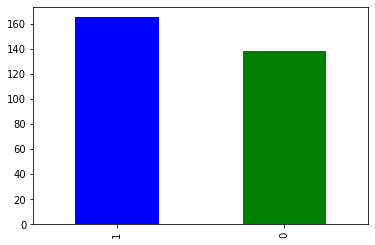

In [3]:
hearty["target"].value_counts().plot.bar(color=["blue","green"]);

### Comparison of different features with target

In [4]:
#usage of pandas crosstab
#view target in terms of sex
pd.crosstab(hearty.target,hearty.sex,colnames=["Sex"])

Sex,0,1
target,,
0,24,114
1,72,93


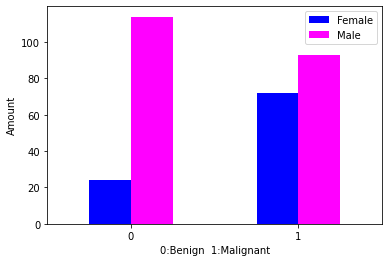

In [5]:
#visualization of the relationship
pd.crosstab(hearty.target, hearty.sex).plot(kind = "bar",color=["blue","magenta"])
plt.xlabel("0:Benign  1:Malignant")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [16]:
#compare age with thalach
hearty.thalach.value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

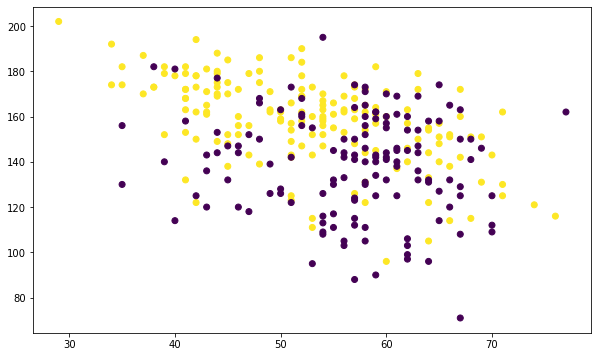

In [6]:
#visualise age vs thalach
plt.figure(figsize=[10,6])

plt.scatter(hearty.age,hearty.thalach,c=hearty.target);

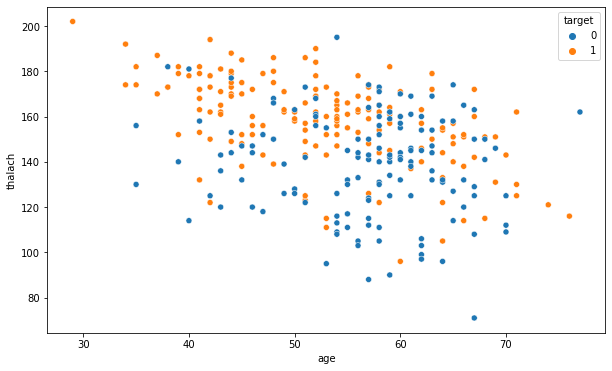

In [7]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=hearty.age,y=hearty.thalach,hue=hearty.target);

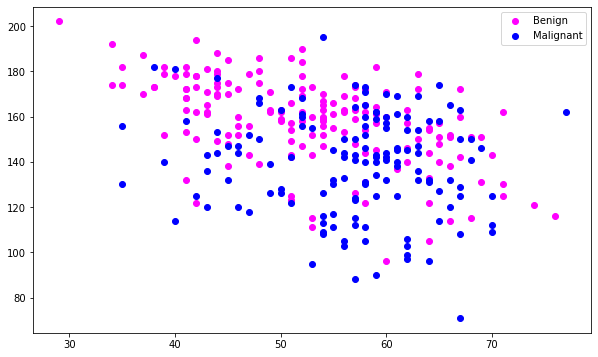

In [8]:
plt.figure(figsize=[10,6])

plt.scatter(hearty.age[hearty.target==1],hearty.thalach[hearty.target==1],c="magenta")
plt.scatter(hearty.age[hearty.target==0],hearty.thalach[hearty.target==0],c="blue")
plt.legend(["Benign","Malignant"]);

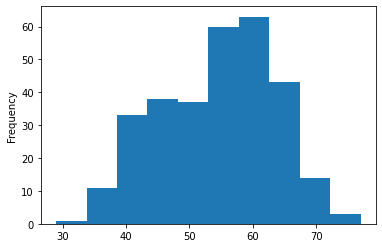

In [34]:
#view how age is distributed
hearty.age.plot.hist();

In [35]:
hearty.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [36]:
pd.crosstab(hearty.cp,hearty.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


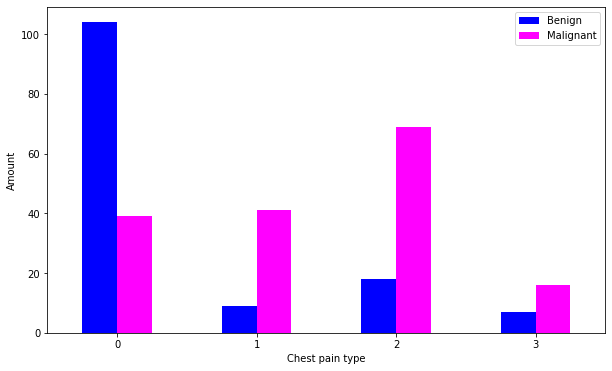

In [9]:
pd.crosstab(hearty.cp,hearty.target).plot(kind="bar",color=["blue","magenta"],figsize=[10,6])
plt.legend(["Benign","Malignant"])
plt.xticks(rotation=0)
plt.xlabel("Chest pain type")
plt.ylabel("Amount");

• watch the 10th

In [10]:
hearty.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


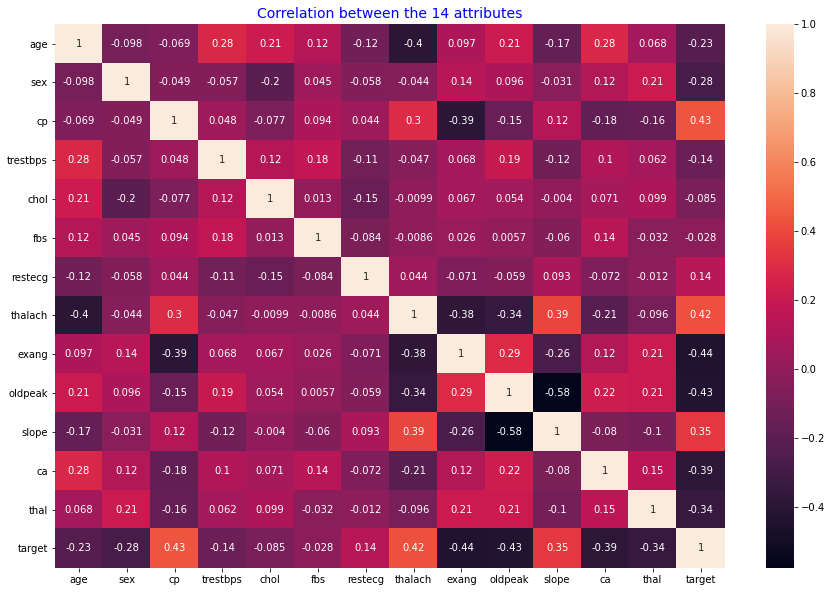

In [4]:
plt.figure(figsize=[15,10])
sns.heatmap(hearty.corr(),annot=True)
plt.title("Correlation between the 14 attributes",fontdict={'fontsize': 14,
                                                            'fontweight': 1,
                                                            'color': "blue"});

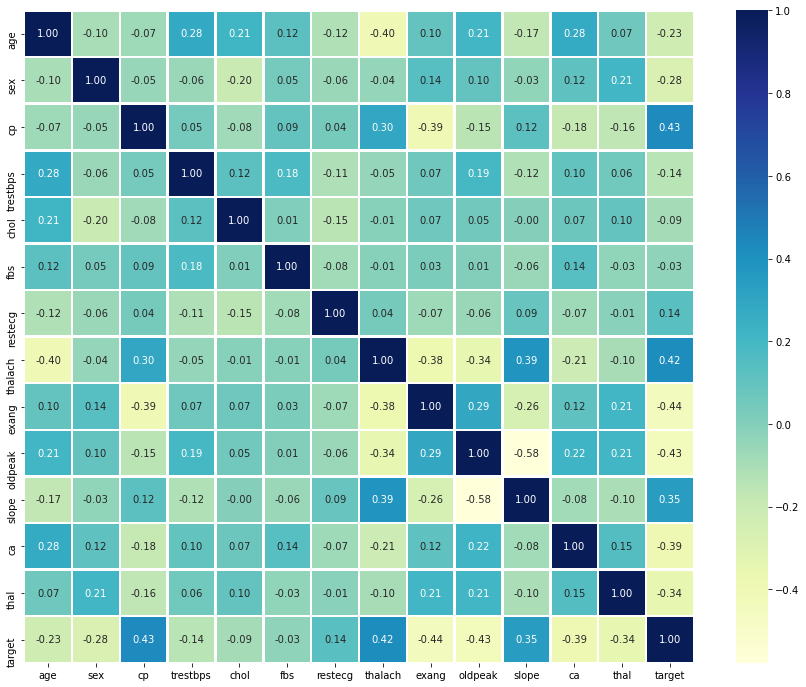

In [5]:
#pythonic way
heart_cor = hearty.corr()
fig, ax = plt.subplots(figsize=[15,12])
ax = sns.heatmap(heart_cor,annot=True,fmt=".2f",linewidths=1.5,cmap="YlGnBu");

## Modelling

In [6]:
#split data into features and label
X = hearty.drop("target", axis = 1)
y = hearty["target"]
#split data into train and test datasets
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
X.shape,X_train.shape,len(y_train),len(y)

((303, 13), (242, 13), 242, 303)

In [7]:
#create a model fitting and scoring function
models = {"KNN":KNeighborsClassifier(),
          "Logistic":LogisticRegression(),
          "Random Forest":RandomForestClassifier()}

#define our function
def model_fit(models,X_train,X_test,y_train,y_test):
    """
    We are creating a function to fit and test different models
    """
    #set our random seed
    np.random.seed(42)
    #create an empty dict
    model_sel = {}
    #loop thru
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_sel[name] = model.score(X_test, y_test)
    return model_sel

In [8]:
modely = model_fit(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
modely

C:\Users\user\Desktop\Milestone_1\envy\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

In [9]:
#visualize
model_df =pd.DataFrame(modely,index=["accuracy"])
model_df

,KNN,Logistic,Random Forest
accuracy,0.688525,0.885246,0.836066


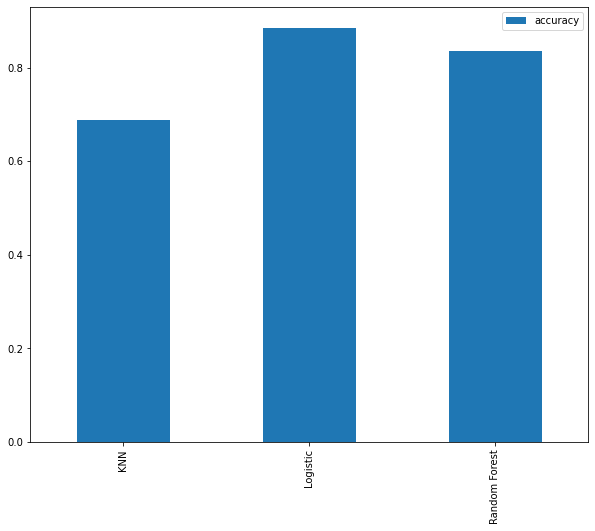

In [10]:
model_df.T.plot(kind="bar",figsize=[10,8]);

In [11]:
#tuning KNN
trainy = []
testy = []

neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    trainy.append(knn.score(X_train,y_train))
    testy.append(knn.score(X_test,y_test))

In [12]:
trainy

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [13]:
testy

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max accuracy for test set is: 75.41%


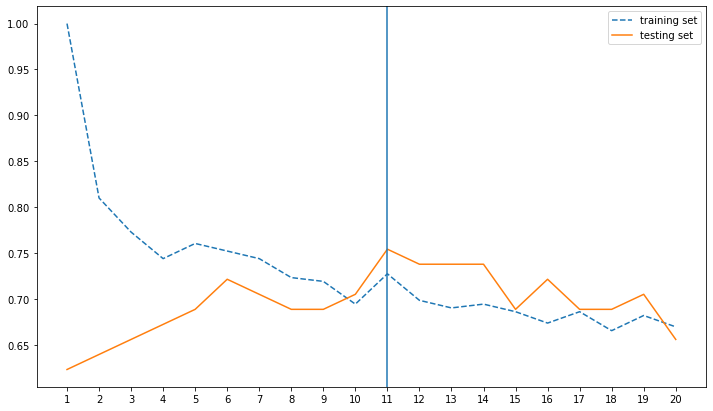

In [14]:
plt.figure(figsize=[12,7])
plt.plot(neighbors,trainy,'--',label="training set")
plt.plot(neighbors,testy,label="testing set")
plt.axvline(np.argmax(np.array(testy))+1)
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f"Max accuracy for test set is: {max(testy)*100:.2f}%")

In [56]:
np.argmax(np.array(testy))

10

In [58]:
testy[10]

0.7540983606557377

•finished 14

#### Hyperparameter tuning using randomizedsearchcv

In [16]:
log_par = {
            "solver" : ["liblinear"],
            "C":np.logspace(-4,4,20)}
rando_par = {
            "n_estimators": np.arange(10,1000,50),
            "max_depth" : [None, 3, 5, 10],
            "min_samples_split" : np.arange(2,20,2),
            "min_samples_leaf" : np.arange(1,20,2)}

In [17]:
np.random.seed(42)

log_mo = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=log_par,
                            n_iter=20,
                            cv=5,
                            verbose=True)

log_mo.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [18]:

log_mo.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [19]:
log_mo.score(X_test,y_test)

0.8852459016393442

In [20]:
#random search for random forest
rf_mo = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rando_par,
                           n_iter=20,
                           cv=5,
                           verbose=True)
rf_mo.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [21]:
rf_mo.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [22]:
rf_mo.score(X_test,y_test)

0.8688524590163934

In [23]:
model_fit

<function __main__.model_fit(models, X_train, X_test, y_train, y_test)>

In [24]:
modely

{'KNN': 0.6885245901639344,
 'Logistic': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

#### hyperparameter tuning using grid search

In [25]:
log_grid = {
            "solver" : ["liblinear"],
            "C":np.logspace(-4,4,30)}

In [26]:
log_mo_gr = GridSearchCV(LogisticRegression(),
                         param_grid=log_grid,
                         cv=5,
                         verbose=True)
log_mo_gr.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [27]:
log_mo_gr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [28]:
log_mo_gr.score(X_test,y_test)

0.8852459016393442

#### Evaluating our tuned classification model

In [29]:
y_preds = log_mo_gr.predict(X_test)

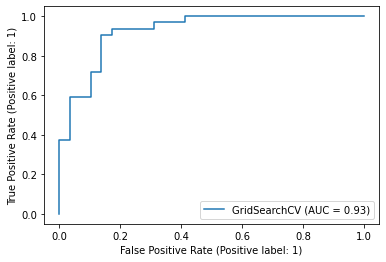

In [31]:
#using roc curve
plot_roc_curve(log_mo_gr,X_test,y_test);

In [32]:
#use confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [34]:
def plot_conf_matrix(y_true,y_pred):
    fig, ax = plt.subplots(figsize=[9,7])
    ax = sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,cbar=False,cmap="YlGnBu");
    plt.xlabel("True value")
    plt.ylabel("Predicted value")

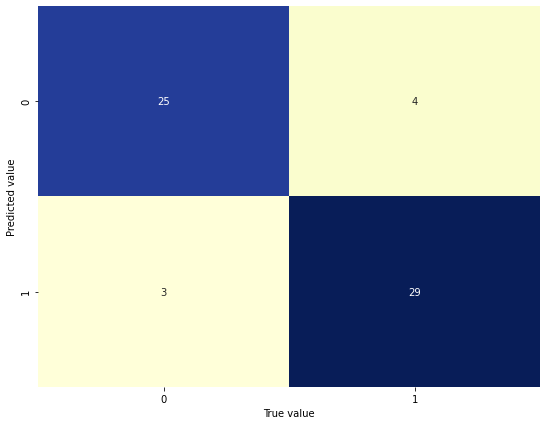

In [35]:
plot_conf_matrix(y_test,y_preds)

In [37]:
#classification report
#precision--->true positive rate
#recall--->true negative rate
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### evaluating using cross validation

In [39]:
log_mo_gr.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
clf = LogisticRegression(solver="liblinear",C=0.20433597178569418)

In [41]:
#cross val with accuracy
cr_acc = cross_val_score(clf,X,y,scoring="accuracy",cv=5)
cr_acc = np.mean(cr_acc)
cr_acc

0.8446994535519124

In [43]:
#cross val with precision
cr_prec = cross_val_score(clf,X,y,scoring="precision",cv=5)
cr_prec = np.mean(cr_prec)
cr_prec

0.8207936507936507

In [44]:
#cross val with recall
cr_rec = cross_val_score(clf,X,y,scoring="recall",cv=5)
cr_rec = np.mean(cr_rec)
cr_rec

0.9212121212121213

In [45]:
#cross val with f1
cr_f1 = cross_val_score(clf,X,y,scoring="f1",cv=5)
cr_f1 = np.mean(cr_f1)
cr_f1

0.8673007976269721

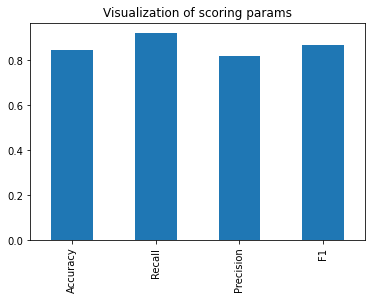

In [47]:
#visualize
cv_vis = pd.DataFrame({"Accuracy":cr_acc,
                       "Recall":cr_rec,
                       "Precision":cr_prec,
                       "F1":cr_f1}, index=[0])
cv_vis.T.plot.bar(title="Visualization of scoring params",legend=False);